## Reto Restaurantes Colombianos


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
tf.__version__

'2.4.1'

In [ ]:
import

### Los datos

[kaggle: twitter-airline-sentiment](https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv)

In [7]:
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)

#ruta = 'gdrive/My Drive/Colab Notebooks/Sentimientos'


Mounted at /content/gdrive


In [2]:
#df= pd.read_csv(ruta + '/restaurant_reviews_clean.csv')
df= pd.read_csv('restaurant_reviews.csv')
df.head()

,Nombre,Título,Fecha,Rating,Reviews,Tipo,reviews_limpios
0,Casa Vieja Restaurante,Comida Tiquita en un ambiente muy colombiano,15 de octubre de 2019,50,Tuve la experiencia de ir almozar a este típic...,"Colombiana, Sudamericana",experiencia almozar típico restaurante colombi...
1,Casa Vieja Restaurante,Me gustó!!,22 de octubre de 2018,40,"El restaurante es agradable, antiguo y familia...","Colombiana, Sudamericana",restaurante agradable antiguo familiar persona...
2,Casa Vieja Restaurante,Restaurante tradicional frente al Hotel Tequen...,18 de septiembre de 2018,40,"Llegamos tarde como a las 17 horas, ya no habí...","Colombiana, Sudamericana",llegamos tarde horas público atendieron bien c...
3,Casa Vieja Restaurante,QUE GRATO VOLVER,4 de agosto de 2016,50,Hace años no disfrutaba de un almuerzo en este...,"Colombiana, Sudamericana",hace años disfrutaba almuerzo agradable restau...
4,Casa Vieja Restaurante,Un clásico que no defrauda,1 de agosto de 2016,40,Lugar típico de cocina colombiana que uno no p...,"Colombiana, Sudamericana",lugar típico cocina colombiana puede dejar vis...


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('Unnamed: 0.1', axis=1, inplace=True)

In [4]:
df.head()

,Nombre,Título,Fecha,Rating,Reviews,Tipo,reviews_limpios
0,Casa Vieja Restaurante,Comida Tiquita en un ambiente muy colombiano,15 de octubre de 2019,50,Tuve la experiencia de ir almozar a este típic...,"Colombiana, Sudamericana",experiencia almozar típico restaurante colombi...
1,Casa Vieja Restaurante,Me gustó!!,22 de octubre de 2018,40,"El restaurante es agradable, antiguo y familia...","Colombiana, Sudamericana",restaurante agradable antiguo familiar persona...
2,Casa Vieja Restaurante,Restaurante tradicional frente al Hotel Tequen...,18 de septiembre de 2018,40,"Llegamos tarde como a las 17 horas, ya no habí...","Colombiana, Sudamericana",llegamos tarde horas público atendieron bien c...
3,Casa Vieja Restaurante,QUE GRATO VOLVER,4 de agosto de 2016,50,Hace años no disfrutaba de un almuerzo en este...,"Colombiana, Sudamericana",hace años disfrutaba almuerzo agradable restau...
4,Casa Vieja Restaurante,Un clásico que no defrauda,1 de agosto de 2016,40,Lugar típico de cocina colombiana que uno no p...,"Colombiana, Sudamericana",lugar típico cocina colombiana puede dejar vis...


In [16]:
#!pip install google_trans_new
#from googletrans import Translator
#from google_trans_new import google_translator  

In [17]:
#translator = google_translator() 
#df['reviews_limpios'] = df['reviews_limpios'].astype(str)
#df1 = df['reviews_limpios'][:1000]
#df_reviews['reviews_traducidas'] = df1.apply(translator.translate,  dest='en').apply(getattr, args=('text',))


In [67]:
#for j in range(len(df['reviews_limpios'][:20])):
 #   df['reviews_traducidas'][j] = translator.translate(df['reviews_limpios'][j], lang_src='es', lang_tgt='en')

In [3]:
def polarity_to_label(x):
    if(x <= 20):
        return 'negative'
    if(x == 30):
        return 'neutral'
    if(x >= 40):
        return 'positive'
df['etiquetas'] = df.Rating.apply(polarity_to_label)

### Análisis descriptivos

In [4]:
df = df[df['etiquetas'] != 'neutral']
df.head(10)
# convert airline_seentiment to numeric


,Nombre,Título,Fecha,Rating,Reviews,Tipo,reviews_limpios,etiquetas
0,Casa Vieja Restaurante,Comida Tiquita en un ambiente muy colombiano,15 de octubre de 2019,50,Tuve la experiencia de ir almozar a este típic...,"Colombiana, Sudamericana",experiencia almozar típico restaurante colombi...,positive
1,Casa Vieja Restaurante,Me gustó!!,22 de octubre de 2018,40,"El restaurante es agradable, antiguo y familia...","Colombiana, Sudamericana",restaurante agradable antiguo familiar persona...,positive
2,Casa Vieja Restaurante,Restaurante tradicional frente al Hotel Tequen...,18 de septiembre de 2018,40,"Llegamos tarde como a las 17 horas, ya no habí...","Colombiana, Sudamericana",llegamos tarde horas público atendieron bien c...,positive
3,Casa Vieja Restaurante,QUE GRATO VOLVER,4 de agosto de 2016,50,Hace años no disfrutaba de un almuerzo en este...,"Colombiana, Sudamericana",hace años disfrutaba almuerzo agradable restau...,positive
4,Casa Vieja Restaurante,Un clásico que no defrauda,1 de agosto de 2016,40,Lugar típico de cocina colombiana que uno no p...,"Colombiana, Sudamericana",lugar típico cocina colombiana puede dejar vis...,positive
5,Casa Vieja Restaurante,Luego de 40 años mejor aún!,12 de marzo de 2016,50,"Luego de visitarlo hace 40 años, me consigo un...","Colombiana, Sudamericana",luego visitarlo hace años consigo restaurante ...,positive
6,Casa Vieja Restaurante,Comida típica Colombiana,25 de febrero de 2016,40,"El entorno es muy agradable, desde la decoraci...","Colombiana, Sudamericana",entorno agradable decoración música servicio p...,positive
7,Casa Vieja Restaurante,Recomendable 100% en Bogotá.,16 de septiembre de 2015,50,Exquisita calidad en los platos típicos colomb...,"Colombiana, Sudamericana",exquisita calidad platos típicos colombianos z...,positive
8,Casa Vieja Restaurante,Muy buen Puchero y platos tipicos!!!,11 de septiembre de 2015,40,Regrese después de muchos años y de malas expe...,"Colombiana, Sudamericana",regrese después años malas experiencias ahora ...,positive
9,Casa Vieja Restaurante,Critica de un mexicano,19 de agosto de 2015,40,Estuve con unos amigos y esposa disfrutando es...,"Colombiana, Sudamericana",amigos esposa disfrutando lugar coincido denom...,positive


In [21]:
df2 = df[df['etiquetas'] == 'positive']

In [25]:
df3=df[df['etiquetas'] == 'negative']
df3.shape

(3883, 8)

In [22]:
df2.shape

(36323, 8)

In [23]:
df2=df2.sample(frac=0.5)

In [24]:
df2.shape

(18162, 8)

In [26]:
df_final= pd.concat([df2, df3])
df_final.shape

(22045, 8)

In [29]:
sentiment_label = df_final.etiquetas.factorize() # convierte a factores numéricos
print(sentiment_label)

(array([0, 0, 0, ..., 1, 1, 1]), Index(['positive', 'negative'], dtype='object'))


In [30]:
sentiment_label[0].shape

(22045,)

In [32]:
pd.DataFrame(sentiment_label[0]).value_counts()

0    18162
1     3883
dtype: int64

## Modelo Predictivo: polaridad

### Preprocesamiento de textos

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [36]:

df_final['reviews_limpios'] = df_final['reviews_limpios'].astype(str)


In [37]:
df_final['review_len'] = df_final['reviews_limpios'].astype(str).apply(len)
df_final['word_count'] = df_final['reviews_limpios'].apply(lambda x: len(str(x).split()))

In [38]:
df.describe()

,Rating,review_len,word_count
count,40206.000000,40206.000000,40206.000000
mean,43.489778,119.988758,15.101875
std,10.628372,40.324017,5.005265
min,10.000000,4.000000,1.000000
25%,40.000000,90.000000,11.000000
50%,50.000000,114.000000,14.000000
75%,50.000000,145.000000,18.000000
max,50.000000,2200.000000,267.000000


In [39]:
review = df_final.reviews_limpios.values
tokenizer = Tokenizer(num_words=2200)
tokenizer.fit_on_texts(review)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(review)
padded_sequence = pad_sequences(encoded_docs, maxlen=267)

In [40]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [41]:
print(review[0])
print(encoded_docs[0])

menú amplio delicioso buen precio única observación negativa pago propina voluntario inmediatamente cobran autorización cliente
[42, 352, 29, 9, 22, 298, 1578, 911, 546, 172]


In [42]:
padded_sequence.shape


(22045, 267)

In [43]:
sentiment_label

(array([0, 0, 0, ..., 1, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

### El Modelo keras

In [44]:
#Particion de la data (training y test)
x_train, x_test, y_train, y_test = train_test_split(padded_sequence,sentiment_label[0], test_size = 0.3, random_state = 0)

In [45]:
x_train.shape

(15431, 267)

In [46]:
y_train.shape

(15431,)

In [47]:
pd.DataFrame(y_train).value_counts()

0    12699
1     2732
dtype: int64

In [48]:

# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 15
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=267) )
model.add(SpatialDropout1D(0.5))
model.add(LSTM(5, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 267, 15)           318195    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 267, 15)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 5)                 420       
_________________________________________________________________
dropout (Dropout)            (None, 5)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 318,621
Trainable params: 318,621
Non-trainable params: 0
_________________________________________________________________
None


In [99]:
#from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='../Imagenes/model.png')

In [49]:
history = model.fit(x_train,y_train,validation_split=0.2, epochs=15, batch_size=32)

Epoch 1/15
386/386 [==============================] - 61s 153ms/step - loss: 0.5840 - accuracy: 0.8045 - val_loss: 0.3954 - val_accuracy: 0.8144
Epoch 2/15
386/386 [==============================] - 56s 144ms/step - loss: 0.3636 - accuracy: 0.8561 - val_loss: 0.2375 - val_accuracy: 0.9203
Epoch 3/15
386/386 [==============================] - 59s 154ms/step - loss: 0.2625 - accuracy: 0.9097 - val_loss: 0.1952 - val_accuracy: 0.9378
Epoch 4/15
386/386 [==============================] - 59s 152ms/step - loss: 0.2232 - accuracy: 0.9299 - val_loss: 0.1890 - val_accuracy: 0.9342
Epoch 5/15
386/386 [==============================] - 57s 148ms/step - loss: 0.1995 - accuracy: 0.9389 - val_loss: 0.1694 - val_accuracy: 0.9443
Epoch 6/15
386/386 [==============================] - 54s 140ms/step - loss: 0.1821 - accuracy: 0.9438 - val_loss: 0.1669 - val_accuracy: 0.9433
Epoch 7/15
386/386 [==============================] - 55s 143ms/step - loss: 0.1748 - accuracy: 0.9432 - val_loss: 0.1672 - val_ac

In [69]:
model.save('SentimentModel.h5')

In [61]:
#model = tf.keras.models.load_model('ModeloFinal.h5')

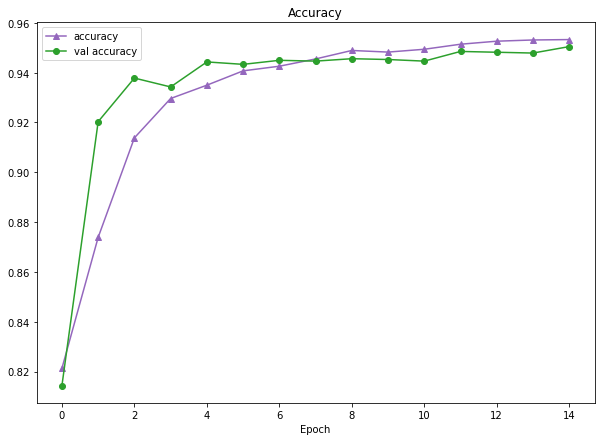

In [50]:
from matplotlib import pyplot as plt
plt.subplots(figsize=(10,7))
plt.plot(history.history['accuracy'], label='accuracy', color = 'tab:purple', marker = '^')
plt.plot(history.history['val_accuracy'], label='val accuracy', color = 'tab:green', marker = 'o')
#plt.ylim([0.87,0.97])
#plt.xlim([0,15])
plt.ylabel('')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.legend()
plt.show()


In [26]:
history.history

{'loss': [0.19431373476982117,
  0.09885523468255997,
  0.08434370160102844,
  0.07419566810131073,
  0.07000431418418884,
  0.06249026581645012,
  0.05944979563355446,
  0.058214038610458374,
  0.05437040328979492,
  0.05457182228565216],
 'accuracy': [0.9337769150733948,
  0.9659557342529297,
  0.9704638719558716,
  0.9753140211105347,
  0.976433277130127,
  0.9782365560531616,
  0.9798221588134766,
  0.9795112609863281,
  0.9823715686798096,
  0.9816254377365112],
 'val_loss': [0.08098403364419937,
  0.07575049996376038,
  0.07948372513055801,
  0.08077573776245117,
  0.08118444681167603,
  0.08761933445930481,
  0.09052020311355591,
  0.09381916373968124,
  0.09610302001237869,
  0.09811465442180634],
 'val_accuracy': [0.9716488718986511,
  0.974260151386261,
  0.9740114212036133,
  0.9743844866752625,
  0.9748818874359131,
  0.9726436138153076,
  0.971275806427002,
  0.968913197517395,
  0.9701566696166992,
  0.9717732071876526]}

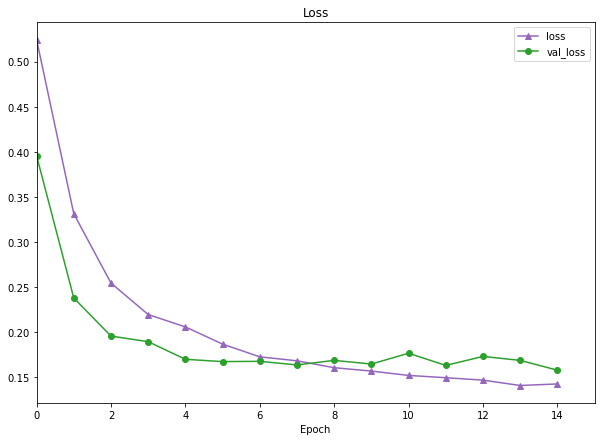

In [51]:
plt.subplots(figsize=(10,7))
plt.plot(history.history['loss'], label='loss', color = 'tab:purple', marker = '^')
plt.plot(history.history['val_loss'], label='val_loss', color = 'tab:green', marker = 'o')
plt.xlim([0,15])
plt.legend()
plt.ylabel('')
plt.xlabel('Epoch')
plt.title('Loss')
plt.show()

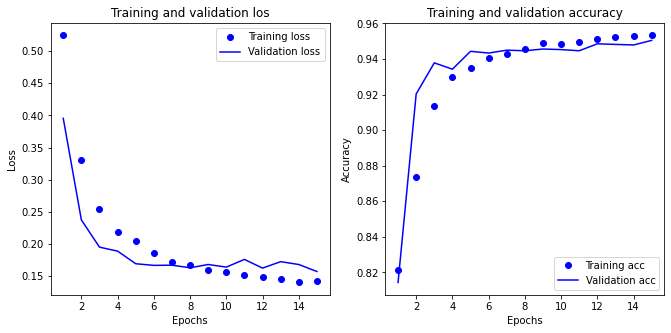

In [52]:
def plot_history(history):

    plt.figure(figsize=(11, 5))

    history_dict = history.history

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    #
    # loss
    #
    plt.subplot(1, 2, 1)
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation los')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    #
    # accuracy
    #
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')


plot_history(history)

In [53]:
# Predicting the Test set results
y_pred = model.predict(x_test)

In [54]:
model.evaluate(x_test,y_test)

207/207 [==============================] - 3s 15ms/step - loss: 0.1772 - accuracy: 0.9412


[0.17715699970722198, 0.9411853551864624]

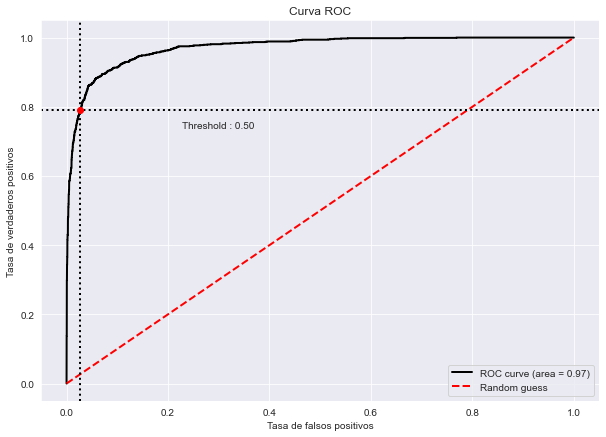

In [55]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=[" 1", "Class 2"])

# Figures
plt.subplots(figsize=(10,7))
bc.plot_roc_curve()
plt.title('Curva ROC')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.show()

In [56]:
#y_pred = (y_pred > 0.5)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <=0.5] = 0

In [57]:
pd.DataFrame(y_pred).value_counts()

0.0    5558
1.0    1056
dtype: int64

In [58]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5316,  147],
       [ 242,  909]])

<AxesSubplot:>

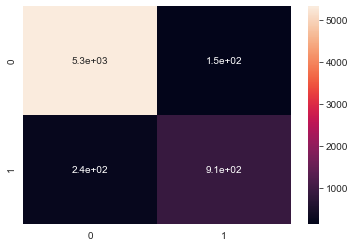

In [60]:
sns.heatmap(cm,annot=True)

In [61]:
from sklearn.metrics import classification_report
print('Reporte de claisficación: \n', classification_report(y_test,y_pred))

Reporte de claisficación: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      5463
           1       0.86      0.79      0.82      1151

    accuracy                           0.94      6614
   macro avg       0.91      0.88      0.89      6614
weighted avg       0.94      0.94      0.94      6614



In [67]:
a=['Ese restaurante no me gusto, malo','algo lindo y especial']
tw = tokenizer.texts_to_sequences(a)
tw = pad_sequences(tw,maxlen=267)

In [68]:
model.predict(tw)

array([[0.84108806],
       [0.46487328]], dtype=float32)

In [48]:
model.save('ModeloFinal.h5')